In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import os
import tarfile
from six.moves import urllib

In [4]:
#!pip install minisom

In [6]:
dataset = pd.read_csv('data/palavras-pouco-frequentes-apl-3orgao.csv', index_col=0 )


In [7]:
dataset.head()

,10o,11a,11o,13a,13o,14a,15a,1a,24a,3a,...,volum,volunt,vontad,vulner,xii,xv,xxi,xxii,xxxv,zer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = dataset.iloc[:, :].values
y = dataset.iloc[:, ].values

In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [82]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 15, y = 15, input_len = dataset.shape[1], sigma = 1.0, learning_rate = 0.5, random_seed = 4214)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 2500)

In [83]:
# grupo: rio

dado0 = dataset.iloc[6]   # circulo verde
dado1 = dataset.iloc[34]  # circulo preto
dado2 = dataset.iloc[206] # circulo vermelho

test0 = som.winner(dado0.tolist())    
test1 = som.winner(dado1.tolist())   
test2 = som.winner(dado2.tolist()) 

print(test0)
print(test1)
print(test2)

(14, 5)
(14, 10)
(14, 8)


In [84]:
# grupo: indefer

dado3 = dataset.iloc[69]  # circulo amarelo
dado4 = dataset.iloc[79]  # circulo azul
dado5 = dataset.iloc[190] # quadrado verde

test3 = som.winner(dado3.tolist())    
test4 = som.winner(dado4.tolist())   
test5 = som.winner(dado5.tolist()) 

print(test3)
print(test4)
print(test5)

(7, 5)
(10, 8)
(12, 12)


In [85]:
# grupo: institu

dado6 = dataset.iloc[4] # quadrado azul
dado7 = dataset.iloc[79]  # quadrado vermelho
dado8 = dataset.iloc[709] # quadrado amarelo
dado9 = dataset.iloc[187] # quadrado preto

test6 = som.winner(dado6.tolist())    
test7 = som.winner(dado7.tolist())   
test8 = som.winner(dado8.tolist()) 
test9 = som.winner(dado9.tolist()) 

print(test6) # igual a 9
print(test7)
print(test8)
print(test9) # igual a 4

(14, 2)
(10, 8)
(1, 10)
(14, 2)


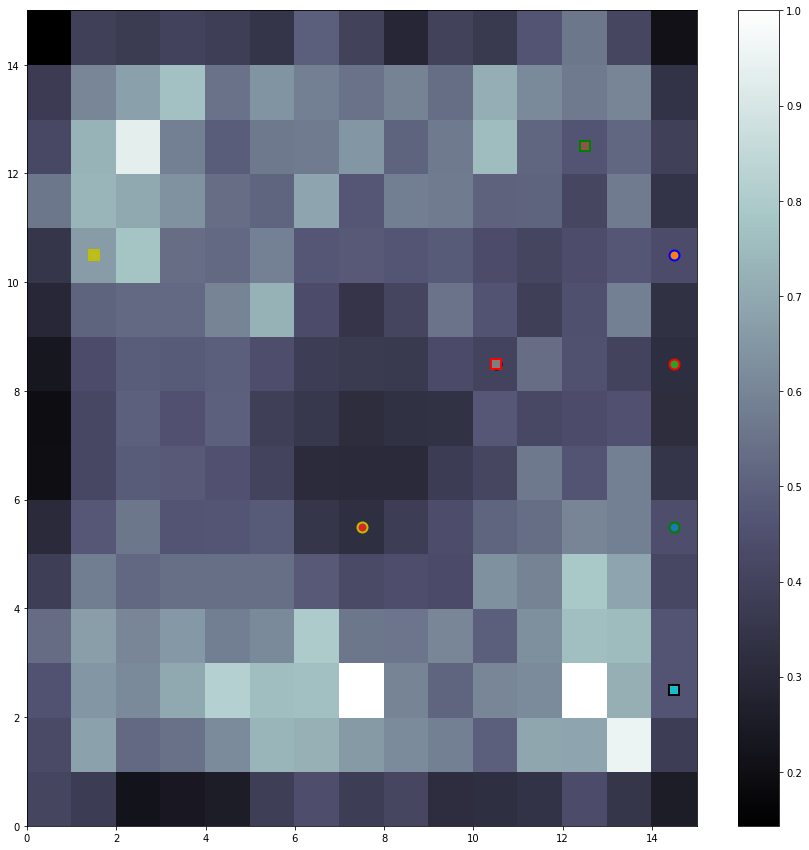

In [86]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
plt.figure(figsize=(15,15))
bone()
pcolor(som.distance_map().T)
colorbar()

plot(test0[0] + 0.5, test0[1] +0.5, 'o', markeredgecolor='g', markersize = 10, markeredgewidth = 2)
plot(test1[0] + 0.5, test1[1] +0.5, 'o', markeredgecolor='b', markersize = 10, markeredgewidth = 2)
plot(test2[0] + 0.5, test2[1] +0.5, 'o', markeredgecolor='r', markersize = 10, markeredgewidth = 2)

plot(test3[0] + 0.5, test3[1] +0.5, 'o', markeredgecolor='y', markersize = 10, markeredgewidth = 2)
plot(test4[0] + 0.5, test4[1] +0.5, 'o', markeredgecolor='k', markersize = 10, markeredgewidth = 2)
plot(test5[0] + 0.5, test5[1] +0.5, 's', markeredgecolor='g', markersize = 10, markeredgewidth = 2)

plot(test6[0] + 0.5, test6[1] +0.5, 's', markeredgecolor='b', markersize = 10, markeredgewidth = 2)
plot(test7[0] + 0.5, test7[1] +0.5, 's', markeredgecolor='r', markersize = 10, markeredgewidth = 2)
plot(test8[0] + 0.5, test8[1] +0.5, 's', markeredgecolor='y', markersize = 10, markeredgewidth = 2)

plot(test9[0] + 0.5, test9[1] +0.5, 's', markeredgecolor='k', markersize = 10, markeredgewidth = 2)


show()


In [18]:
def palavras_contidas(dado):
    palavras = []
    for i in range(len(dado.tolist())):
        if dado.tolist()[i] > 0:
            palavras.append(dado.index[i])
    return palavras

def exibe_palavas(dado):
    palavras = palavras_contidas(dado)
    for palavra in palavras:
        print(palavra)
    print('\nNúmero de palavras: {}'.format(len(palavras)))    
    
def acha_dado_com_palavra(palavra):
    numero_documentos_com_essa_palavra = 0
    lista = dataset[palavra].tolist()
    for i in range(len(lista)):
        if lista[i] > 0:
            numero_documentos_com_essa_palavra += 1
            print(i)
    print('\nNúmero de documentos com essa palavra: {}'.format(numero_documentos_com_essa_palavra))
    
def palavras_em_comum(dado1, dado2):
    conta_palavras = 0
    palavras1 = palavras_contidas(dado1)
    palavras2 = palavras_contidas(dado2)
    for palavra in palavras1:
        if palavra in palavras2:
            print(palavra)
            conta_palavras += 1
    print('\nNúmero de palavras: {}'.format(conta_palavras))   

In [32]:
palavras_em_comum(dado7, dado1)

human
larg
limitaco
rio

Número de palavras: 4


In [57]:
acha_dado_com_palavra('institu')

4
74
187
219
255
383
709
727
756
815
818
895
996
1461
1567
1572

Número de documentos com essa palavra: 16


In [61]:
exibe_palavas(dataset.iloc[4])

beneficiari
confianc
disposica
edica
exceca
exclu
funca
gap
gratificaca
gratificaco
gratu
institu
penitenciari
regim
sid
ter

Número de palavras: 16


In [62]:
exibe_palavas(dataset.iloc[74])

acord
aplic
aspir
assistenc
atu
atualizaca
citr
conced
consonanc
conveni
criteri
dispens
empregatici
extranumerari
fac
filh
forc
funcionari
gratu
iden
institu
institut
ipas
madur
mai
music
nacion
obit
objetiv
obst
ocup
ofert
ofic
pensa
permanent
petit
pr
prepar
previdenc
previdenciari
priv
recent
regim
restabelec
sargent
solt
tacit
unia
vigent
vincul

Número de palavras: 50


In [64]:
exibe_palavas(dataset.iloc[709])

acerv
actum
aliment
atualizaca
beneficiari
cancel
carat
cent
co
comprobatori
consonanc
constat
contud
correspond
criteri
depend
dez
divisa
eman
epoc
estudantil
existenc
fac
fatic
graduaca
institu
instituica
ja
lanc
mort
obit
objetiv
observ
ocasia
pensa
pr
previdenc
previdenciari
quot
recent
regit
restabelec
san
sustent
tamb
tempu
vincul

Número de palavras: 47
